
# ***Prediction_using_Supervised_ML***
# ***Rakshanda Gade***



### Linear Regression with Python Scikit Learn
*In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.*

### Simple Linear Regression
*In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.*

In [ ]:
#importing relevant libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt


In [ ]:
# Reading data from url
url = "http://bit.ly/w-data"

df = pd.read_csv(url)

print("Data imported")

print("shape:", df.shape)

#printing first 5 rows
df.head()

Data imported
shape: (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Plotting Data

Text(0.5, 1.0, 'Students Performance')

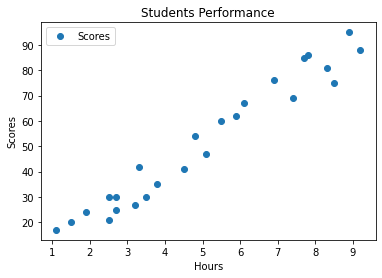

In [ ]:
#plotting data
df.plot(x='Hours', y='Scores', style="o")
x=df['Hours']
z=df['Scores']
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Students Performance")

# Preparing Data

In [ ]:
#preparing data
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Training Algorithm
### Linear Regression

In [ ]:
#training
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training completed")

Training completed


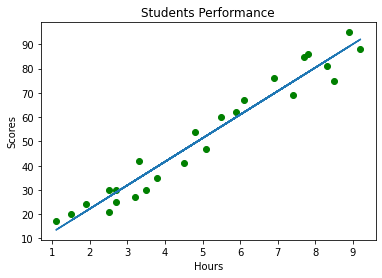

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, c='green')
plt.plot(X, line)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Students Performance")
plt.show()

# Evaluating Score

In [ ]:
#evaluating score of test data
accuracy = regressor.score(X_test, y_test)
print("Accuracy obtained on test dataset:", accuracy)

Accuracy obtained on test dataset: 0.9685603135908575


# Predicting on Test Data

In [ ]:
y_pred = regressor.predict(X_test)
print("X_test:", X_test.flatten())
print("Actual Value:", y_test)
print("Predicted Value:", y_pred)

X_test: [8.3 2.5 2.5 6.9]
Actual Value: [81 30 21 76]
Predicted Value: [83.33366331 27.09319812 27.09319812 69.75837861]


# Plotting Actual Values, Predicted Values VS Test Data

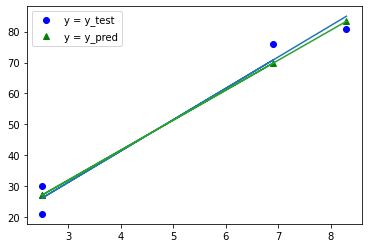

In [ ]:
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, y_pred, 'g^')
plt.legend(['y = y_test', 'y = y_pred', 'BlueLine = y_test', 'GreenLine = y_pred'], loc='upper left')

m, b = np.polyfit(X_test.flatten(), y_test, 1)
#m = slope, b=intercept
plt.plot(X_test, m*X_test + b, color ='tab:blue')

m, b = np.polyfit(X_test.flatten(), y_pred, 1)
#m = slope, b=intercept
plt.plot(X_test, m*X_test + b, color ='tab:green')

plt.show()

# Testing model with our own data

In [ ]:
# Let's test with our own data
hours = [[9.25]]
#hours.reshape(-1, 1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.54546364797365


# Evaluating Model
## Calculating Various KPIs


Root Mean Square Error 

1. Mean Square Error
2. Mean Absolute Error
3. R2
4. Adjusted R2



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
k=1
n=df.shape[0]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('Root Mean Square Error =',RMSE, '\nMean Square Error =',MSE, '\nMean Absolute Error =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

Root Mean Square Error = 4.743 
Mean Square Error = 22.4950956257414 
Mean Absolute Error = 4.393821175688238 
R2 = 0.9685603135908576 
Adjusted R2 = 0.9671933707035035
